## PROJECT INTRODUCTION / PROJECT SUMMARY 

- This project focuses on building and evaluating multiple machine learning classification models to solve the given business problem using structured data provided for the analysis. The primary objective of the project is to analyze the dataset, preprocess the data appropriately, and apply suitable machine learning algorithms to achieve accurate and reliable predictions.

- The project involves exploratory data analysis to understand the data distribution, feature relationships, and potential patterns influencing the target variable. Feature scaling and preprocessing techniques were applied where required to ensure optimal model performance. Multiple classification algorithms were implemented, including Logistic Regression, Support Vector Machine (SVM), and Random Forest, to compare their performance on the same dataset.

- Logistic Regression was used as a baseline linear model after applying standardization to numerical features.

-  Support Vector Machine with a linear kernel was implemented to capture margin-based separation in the data.

-   Random Forest was used as a non-linear ensemble model to handle feature interactions and reduce overfitting.

-   Further, hyperparameter tuning of the Random Forest model was performed using GridSearchCV to improve model performance and select the best parameter combination.

- The performance of each model was evaluated using metrics such as accuracy score, precision, recall, F1-score, and confusion matrix. Based on these evaluations, a comparative analysis was conducted to identify the most suitable model for the given problem.

In [1]:
pip install xlrd #Install XLRD because we need to work on a Excel file.

Note: you may need to restart the kernel to use updated packages.


## IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING EXCEL DATA

In [3]:
file_path = "INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"

df = pd.read_excel(file_path, engine="xlrd")

## UNDERSTANDING DATA

In [4]:
df.head(2) #Data loaded successfully.

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3


In [5]:
df.shape #Total rows = 1200 , Total columns = 28

(1200, 28)

In [6]:
df.info() # All rows have 1200 entries so there are no Null values in our data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## KEY - INSIGHTS FROM DESCRIBE
____________________________________

- Performance Rating: The score is between 2 and 4. The average is 2.95, meaning most people are at level 3.

- Age: The youngest worker is 18 and the oldest is 60. Average age is 37.

- Distance from Home: On average, employees live 9 km away. Some live very far at 29 km.

- Hourly Rate: The pay per hour is between 30 and 100. Average pay is 66.

- Salary Hike: Every employee got at least an 11% hike, and the highest was 25%. Average hike is 15%.

- Total Experience:Average experience is 11 years. Some experts have 40 years of experience.

- Promotions: On average, people haven't been promoted for 2 years. Some have been waiting for 15 years for a promotion.

- Environment Satisfaction: The average score is 2.7 out of 4, which means people are not very happy with the office atmosphere.

- Work-Life Balance: The average is 2.7 out of 4, showing that balance is just "okay" and could be better.

## Business Solutions & Tips (For CEO (Mr.Brain))
______________________________________________________
- Focus on Promotion Gaps: We must look at employees who haven't been promoted for many years (like 10-15 years).

- Action for Non-Performers: If an employee has no promotion and is still not working well, the company should let them go instead of keeping them.

- Company’s Responsibility: If an employee is working hard but the company is not giving them a promotion, it is the company's fault. This makes them lose interest in work.

- Stopping Bad Reputation: These frustrated employees stop working on purpose and talk bad about the company, which ruins the company’s reputation and ratings.

- Motivation is Key: The company needs to identify these "stuck" employees and either promote them or provide training to fix their performance.

## DATA - CLEANING

In [8]:
df.isnull().sum() # Checking again but there are no Null Values in data.

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [9]:
print("Duplicates Row in our data", df.duplicated().sum()) #No duplicate Data

Duplicates Row in our data 0


In [10]:
df.dtypes #Need to match our datatypes with actual data

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

## OUTLIERS CHECKING - VISUALS
__________________________________

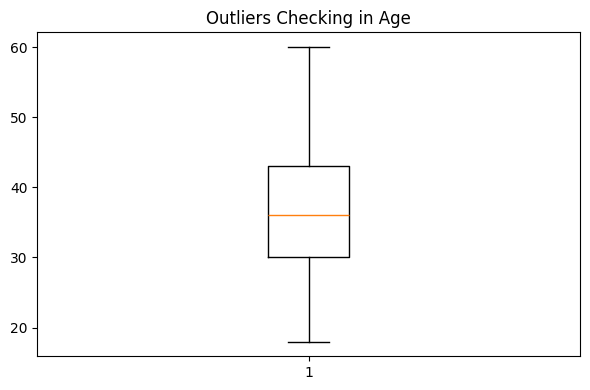

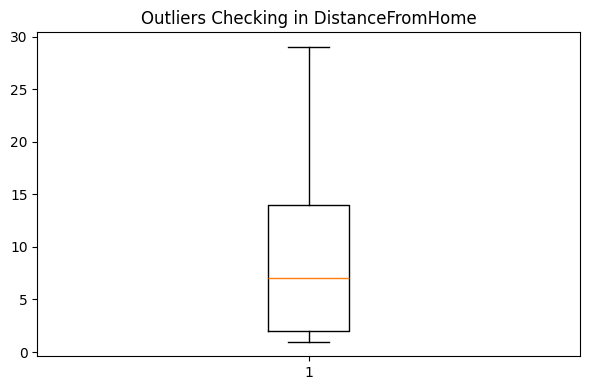

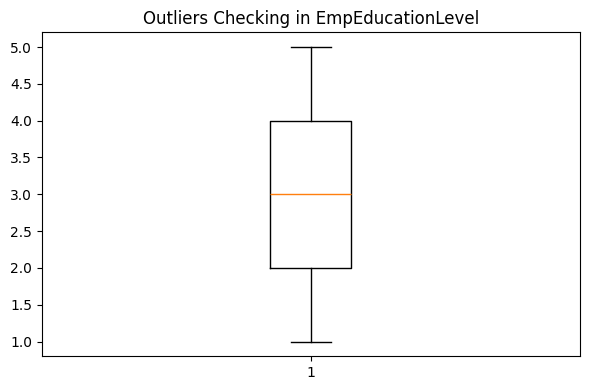

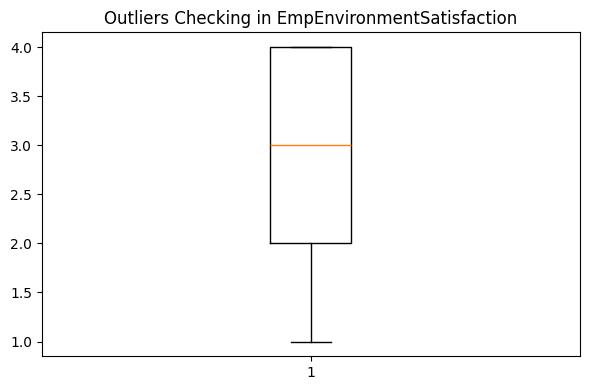

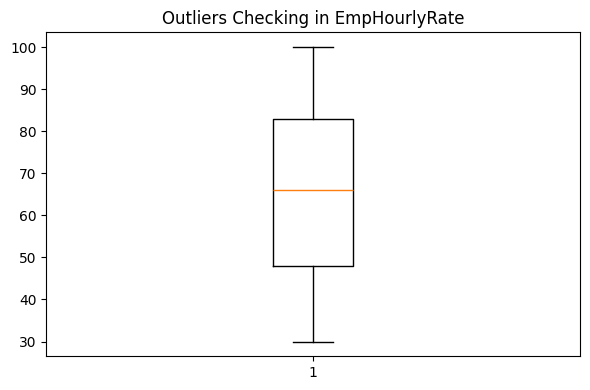

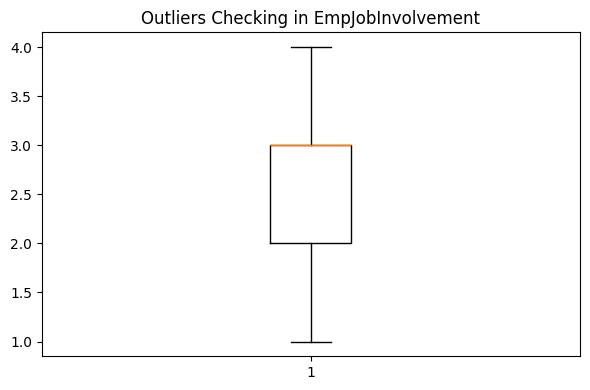

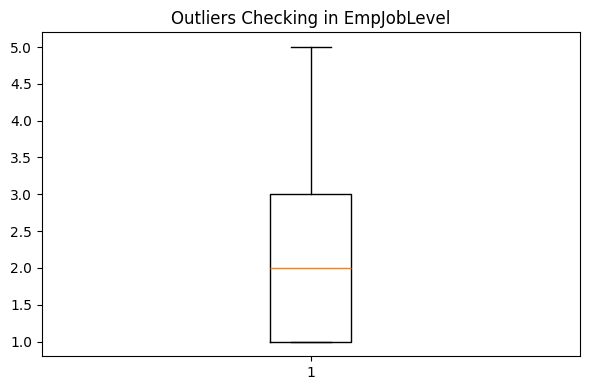

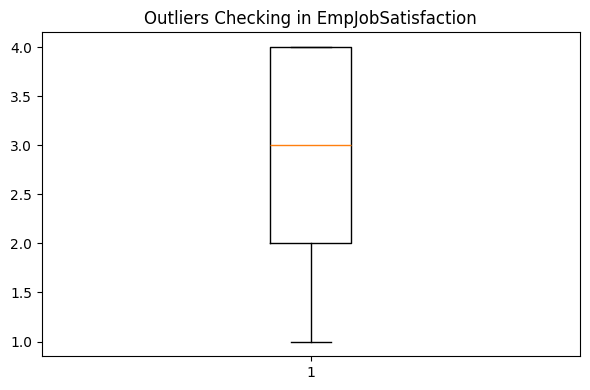

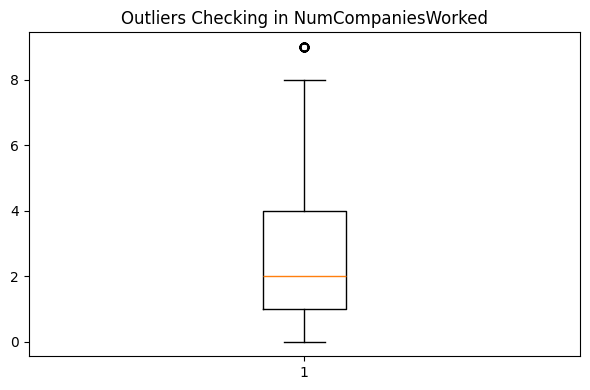

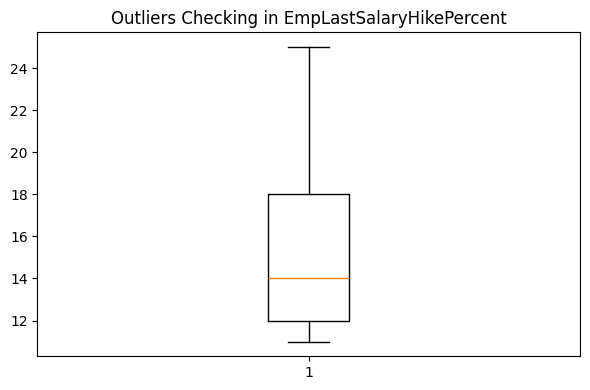

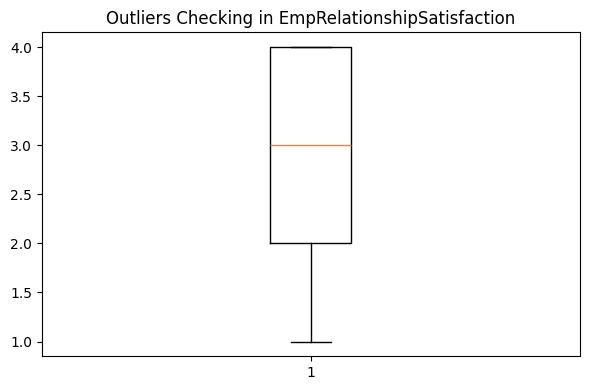

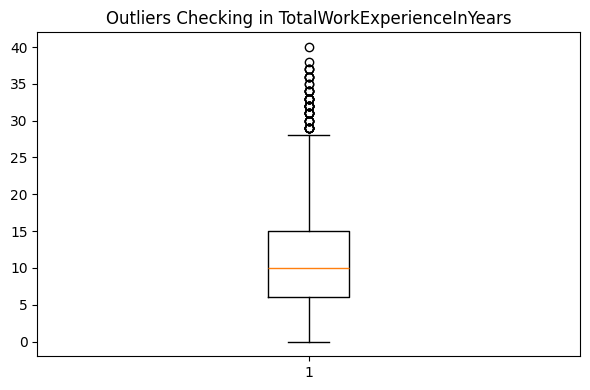

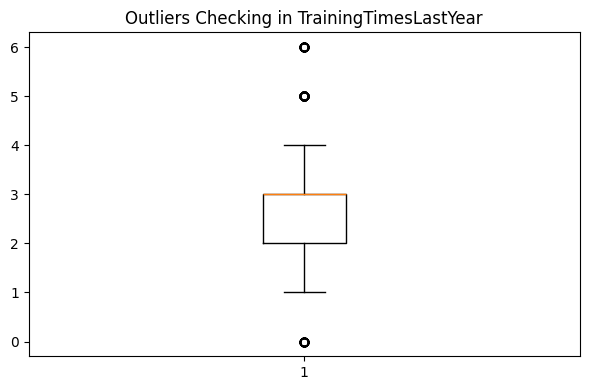

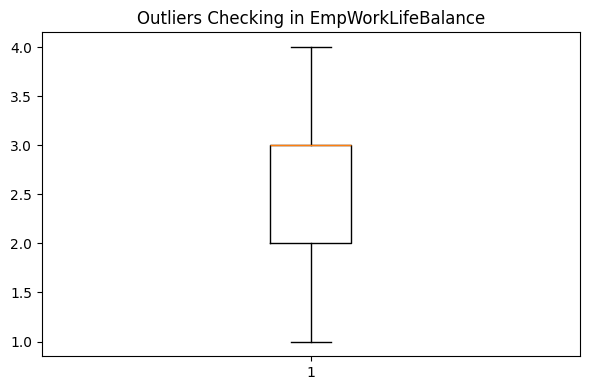

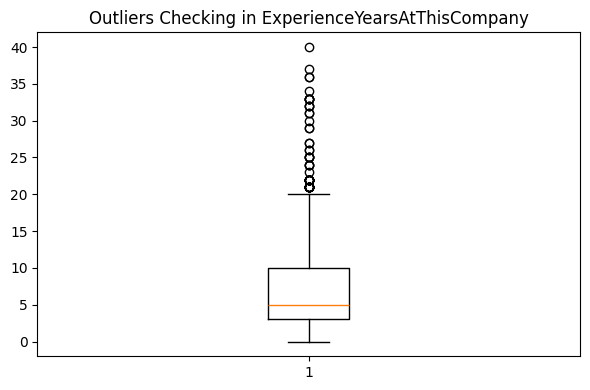

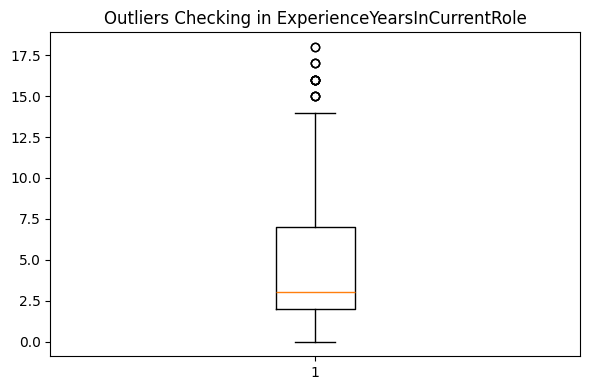

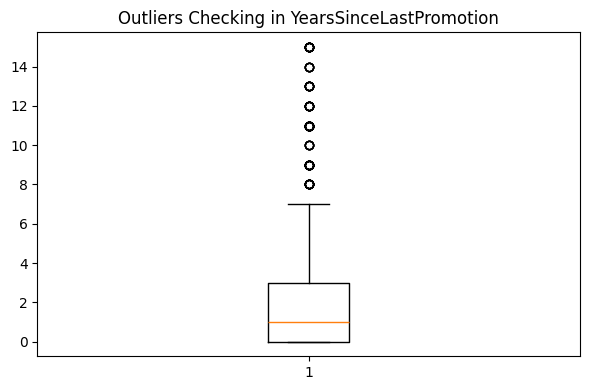

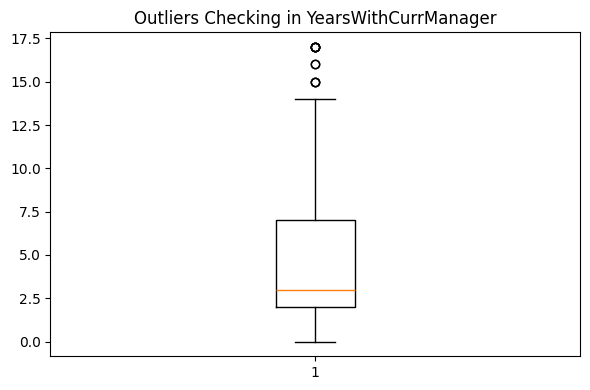

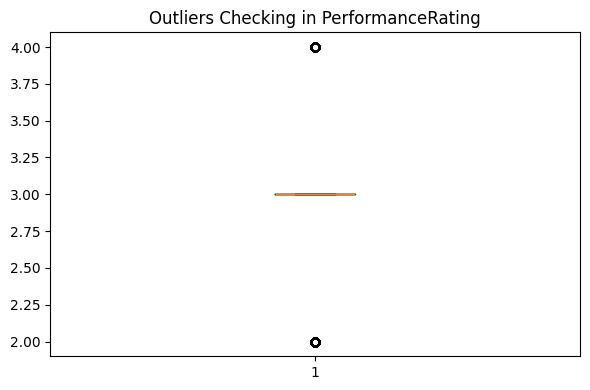

In [11]:
num_col= df.select_dtypes(include=['int64','float64']).columns.to_list()

for col in num_col:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f"Outliers Checking in {col}")
    plt.tight_layout()
    plt.show()

## OUTLIERS CHECKING - NUMBER
__________________________________

In [12]:
num_col = df.select_dtypes('number')

Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_col < (Q1 - 1.5 * IQR)) | (num_col > (Q3 + 1.5 * IQR))).sum()
print(outliers[outliers > 0])

NumCompaniesWorked               39
TotalWorkExperienceInYears       51
TrainingTimesLastYear           188
ExperienceYearsAtThisCompany     56
ExperienceYearsInCurrentRole     16
YearsSinceLastPromotion          88
YearsWithCurrManager             11
PerformanceRating               326
dtype: int64


## OUTLIERS CAPPING - IQR
______________________________

In [13]:
num_cols = ['NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear',
            'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole',
            'YearsSinceLastPromotion','YearsWithCurrManager']

for cols in num_cols:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df[cols] = np.where(df[cols] < lower_bound, lower_bound, 
               np.where(df[cols] > upper_bound, upper_bound, df[cols]))

print("Outliers capped successfully!")

Outliers capped successfully!


## Re-Checking Outliers Counts
___________________________________

In [14]:
num_cols = ['NumCompaniesWorked','TotalWorkExperienceInYears','TrainingTimesLastYear',
            'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole',
            'YearsSinceLastPromotion','YearsWithCurrManager']

for cols in num_cols:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    Outliers = (df[cols]<lower_bound)|(df[cols]>upper_bound)
    print(f"{cols:<30} Outliers = {Outliers.sum()}") 

NumCompaniesWorked             Outliers = 0
TotalWorkExperienceInYears     Outliers = 0
TrainingTimesLastYear          Outliers = 0
ExperienceYearsAtThisCompany   Outliers = 0
ExperienceYearsInCurrentRole   Outliers = 0
YearsSinceLastPromotion        Outliers = 0
YearsWithCurrManager           Outliers = 0


## EDA - INSIGHTS FROM CATEGORICAL COLUMNS.

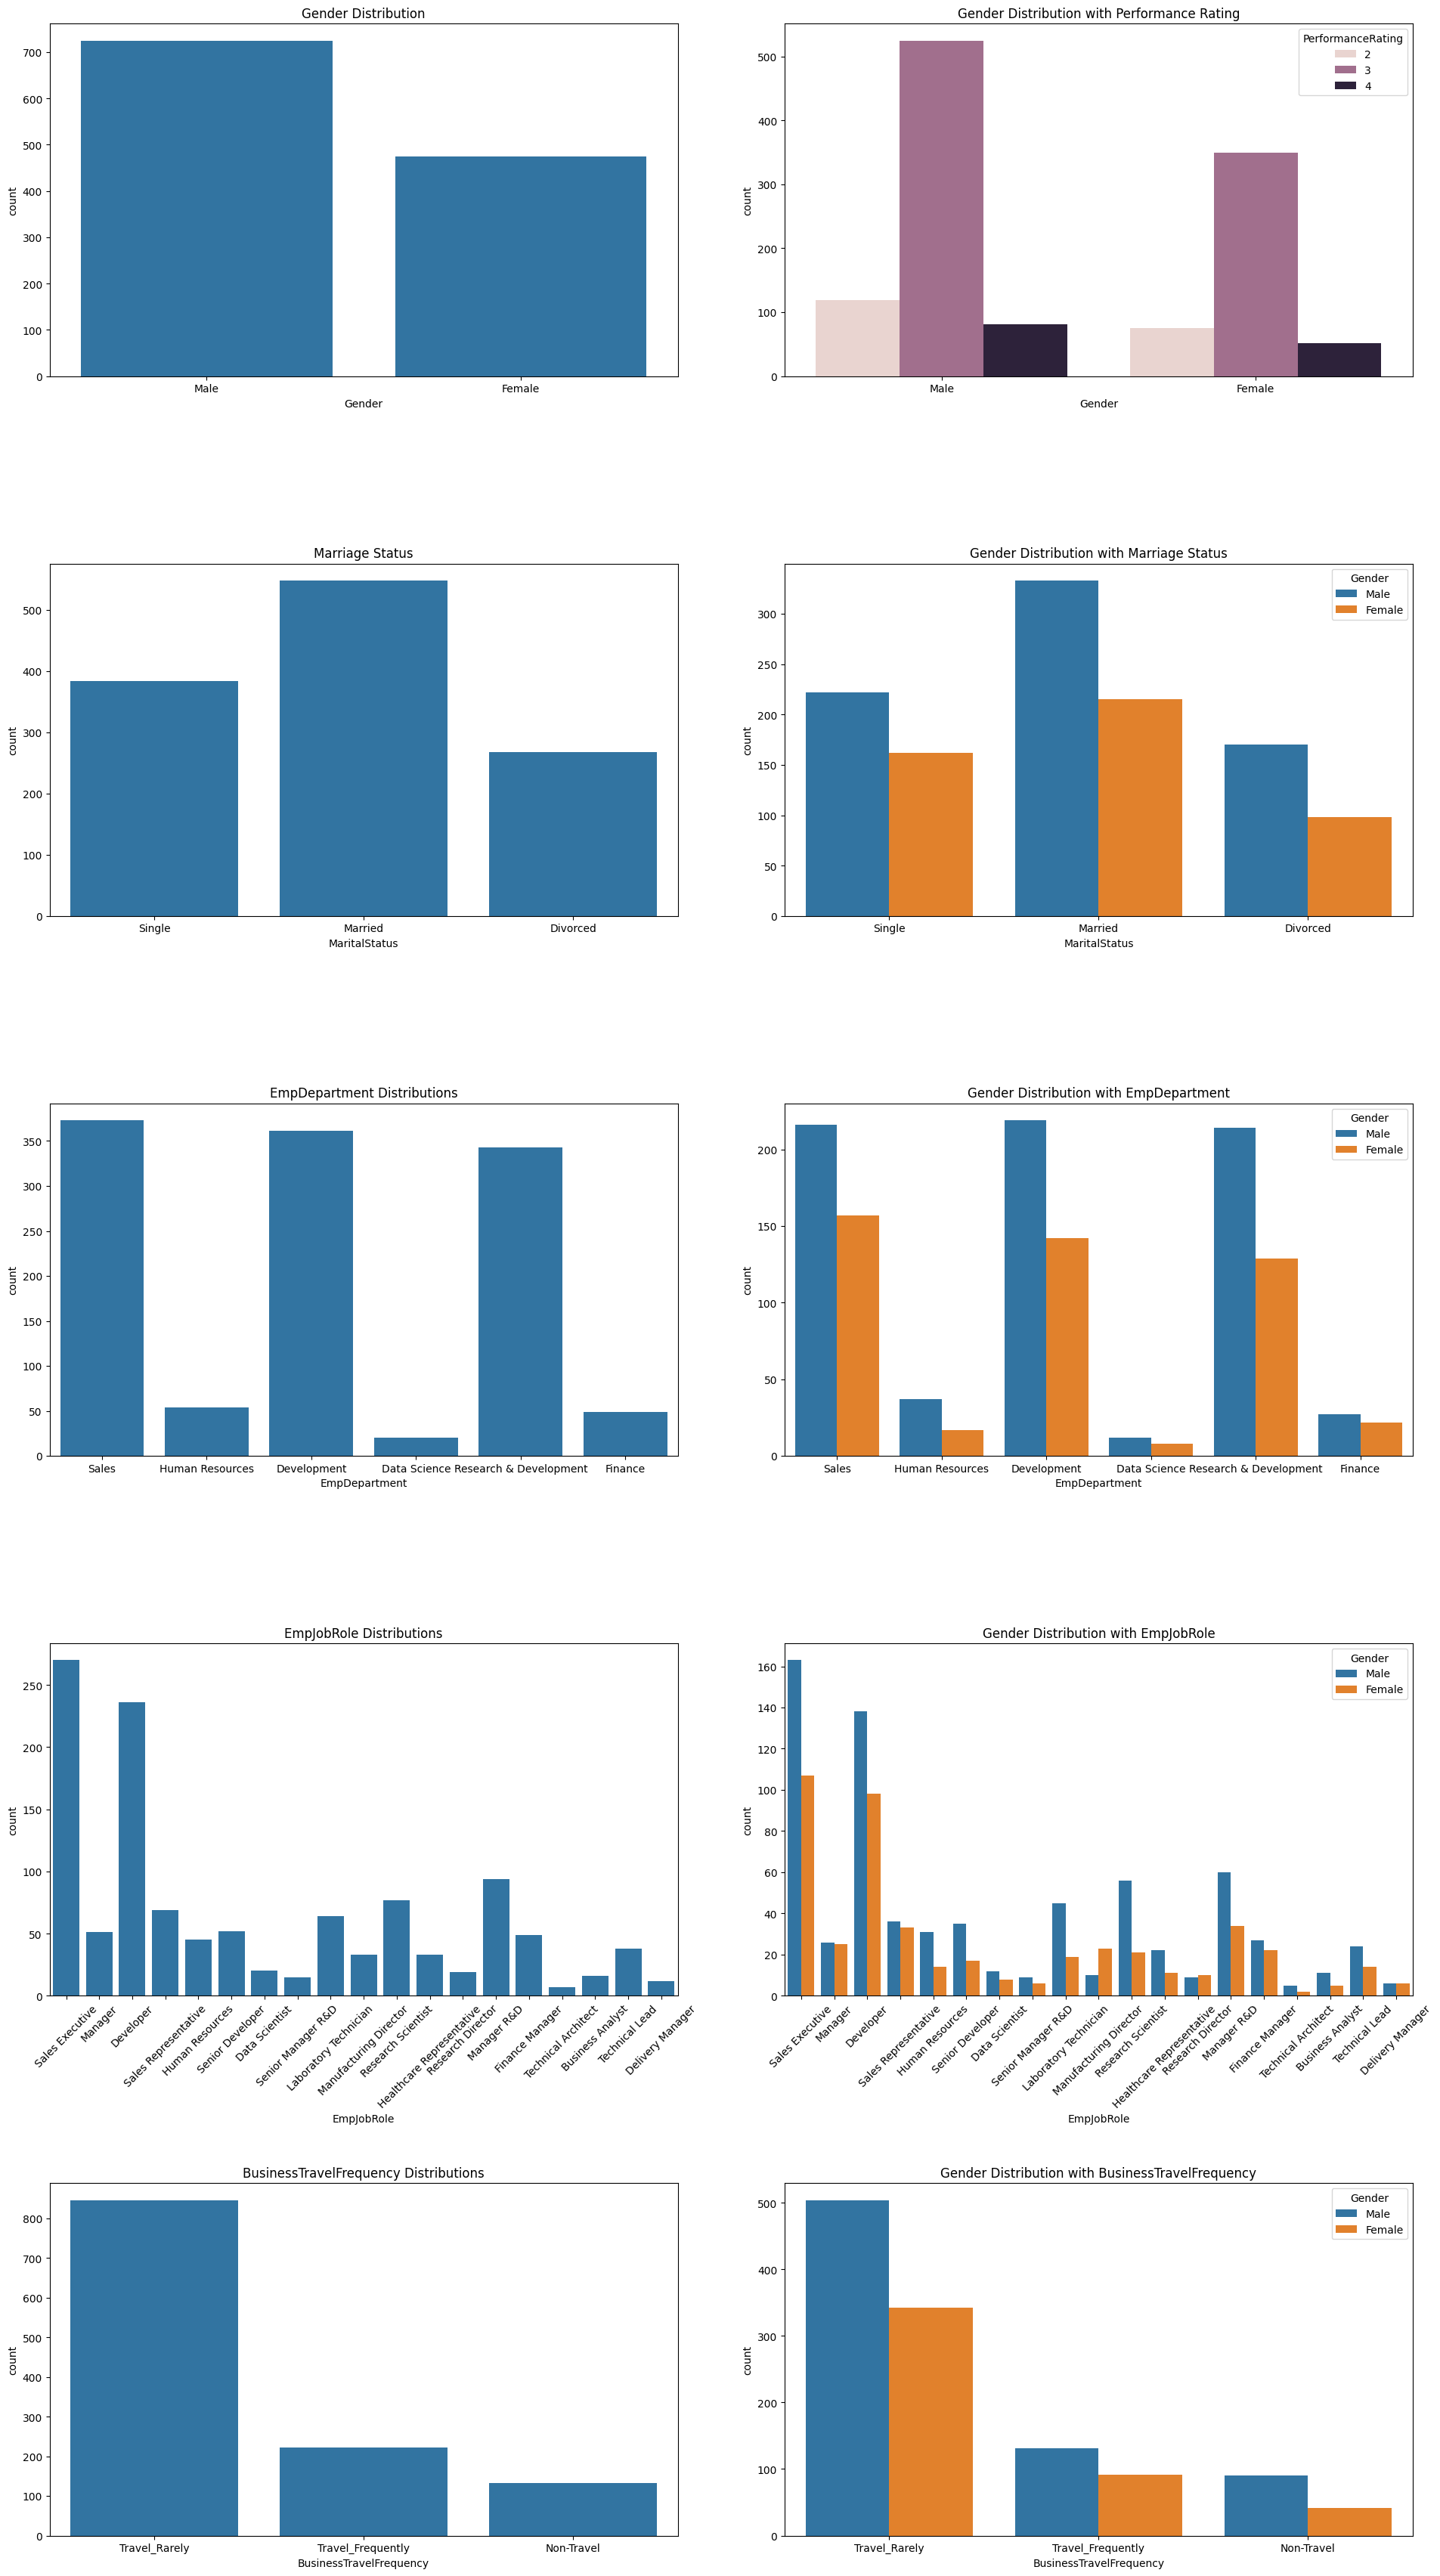

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 35)) 

# Row 1
plt.subplot(5, 2, 1)
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")

plt.subplot(5, 2, 2) 
sns.countplot(x="Gender", data=df, hue="PerformanceRating")
plt.title("Gender Distribution with Performance Rating")

# Row 2
plt.subplot(5, 2, 3) 
sns.countplot(x="MaritalStatus", data=df)
plt.title("Marriage Status")

plt.subplot(5, 2, 4) 
sns.countplot(x="MaritalStatus", data=df, hue="Gender")
plt.title("Gender Distribution with Marriage Status")

# Row 3
plt.subplot(5, 2, 5) #
sns.countplot(x="EmpDepartment", data=df)
plt.title("EmpDepartment Distributions")

plt.subplot(5, 2, 6) 
sns.countplot(x="EmpDepartment", data=df, hue="Gender")
plt.title("Gender Distribution with EmpDepartment")

# Row 4
plt.subplot(5, 2, 7) 
sns.countplot(x="EmpJobRole", data=df)
plt.title("EmpJobRole Distributions")
plt.xticks(rotation=45) 

plt.subplot(5, 2, 8) # Plot number 8
sns.countplot(x="EmpJobRole", data=df, hue="Gender")
plt.title("Gender Distribution with EmpJobRole")
plt.xticks(rotation=45)

# Row 5
plt.subplot(5, 2, 9) 
sns.countplot(x="BusinessTravelFrequency", data=df)
plt.title("BusinessTravelFrequency Distributions")

plt.subplot(5, 2, 10) 
sns.countplot(x="BusinessTravelFrequency", data=df, hue="Gender")
plt.title("Gender Distribution with BusinessTravelFrequency")

plt.tight_layout(pad=4.0)
plt.show()

## KEY INSIGHTS FROM CATEGORICAL COLUMNS
_______________________________________________

## Gender (Plots 1 & 2):
____________________________

- The company has more male employees (725) than female employees (475).

- Both males and females have similar performance ratings; being male or female does not change the rating.
______________________________________________________________________________________________________________
## Marital Status (Plots 3 & 4):
__________________________________

- Most employees in the company are Married (548), followed by Single (384) and Divorced (268).

- The number of males is higher in every marriage category compared to females.
______________________________________________________________________________________

## Departments (Plots 5 & 6):
_________________________________

- Sales, Development, and Research & Development are the three largest departments.

- Data Science is the smallest department with only 20 employees.
________________________________________________________________________________________

## Job Roles (Plots 7 & 8):
___________________________________
- The most common job roles are Sales Executive (270) and Developer (236).

- Job roles like Manager and Senior Manager have very few people compared to technical or sales roles.
__________________________________________________________________________________________________________
## Travel Frequency (Plots 9 & 10):
_________________________________________
- Most employees (846) travel Rarely for work.

- Only 222 employees travel Frequently, while 132 employees do not travel at all.

## EDA - INSIGHTS FROM NUMERICAL COLUMNS.

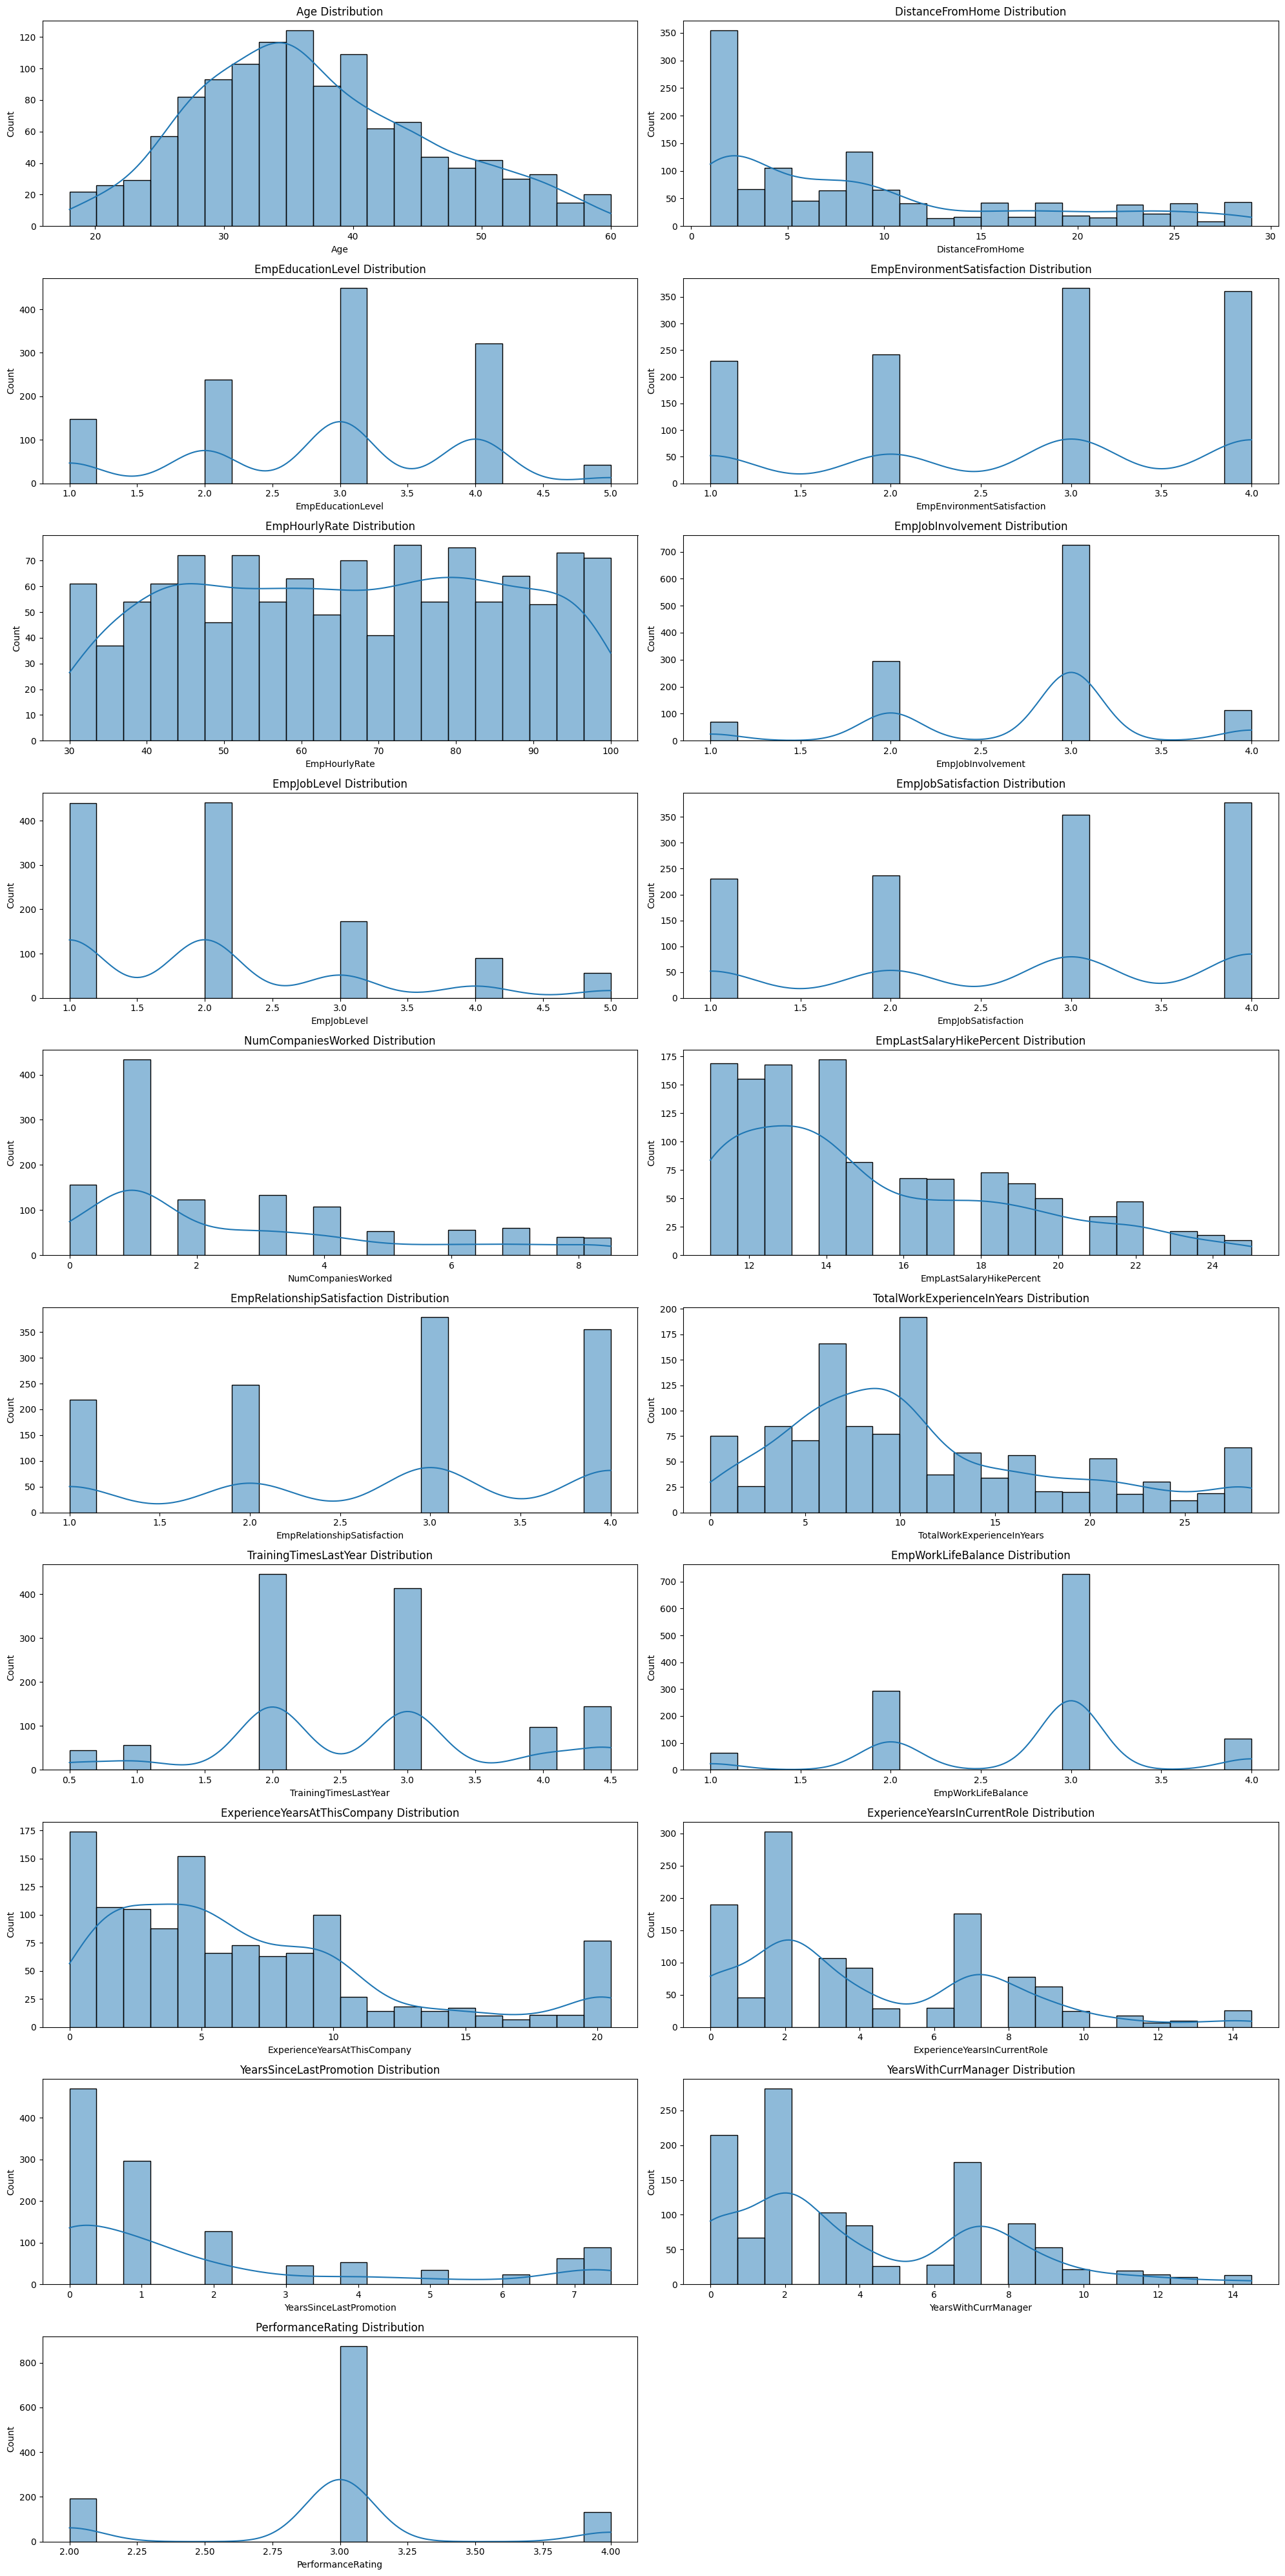

In [16]:
eda_num=df.select_dtypes(include=['int64','float64']).columns.to_list()
plt.figure(figsize=(20,40))

for i , num in enumerate (eda_num , 1):
    plt.subplot(10,2,i)
    sns.histplot(x=df[num],kde=True,bins=20)
    plt.title(f"{num} Distribution")

plt.tight_layout()
plt.show()

## KEY INSIGHTS FROM CATEGORICAL COLUMNS 
_____________________________________________
## Employee Age Distribution: 
- Most employees are between 30 and 45 years old. This means the company has a very mature and experienced workforce.
______________________________________________________________________________________________________________________
## Distance from Home: 
- A huge number of people live very close to the office (within 1-5 km). However, there is a small group that travels nearly 30 km, which could be a reason for their low energy or performance.
________________________________________________________
## Salary Hike Percent:
- Most employees received a salary hike between 11% and 15%. Very few people received high hikes above 20%.
_______________________________________________________________________________________________________________
## Work-Life Balance & Satisfaction: 
- Most employees have rated their satisfaction and work-life balance at level 3. However, there are many employees at level 1 and 2, which shows a clear group of unhappy workers.
_________________________________________
## Total Experience vs. Company Experience: 
- The "Total Work Experience" graph shows a peak at 10 years, but the "Experience Years at This Company" graph peaks at 5 years. This means people usually join this company after gaining experience elsewhere.
_______________________________________________________________________
## Promotion Gaps: 
- The "Years Since Last Promotion" graph is heavily skewed. Most people were promoted recently, but there is a long "tail" of people who have not been promoted in 5 to 15 years. These are the people you mentioned who might be damaging the company's rating.
________________________________________________________________________________________________________________________________
## Performance Rating (Target): 
- The graph shows a very high peak at level 3, a smaller peak at level 2, and the smallest at level 4. This confirms that "Outstanding" performers (Level 4) are very rare in the company right now.

## 01 - Department wise performances
__________________________________________

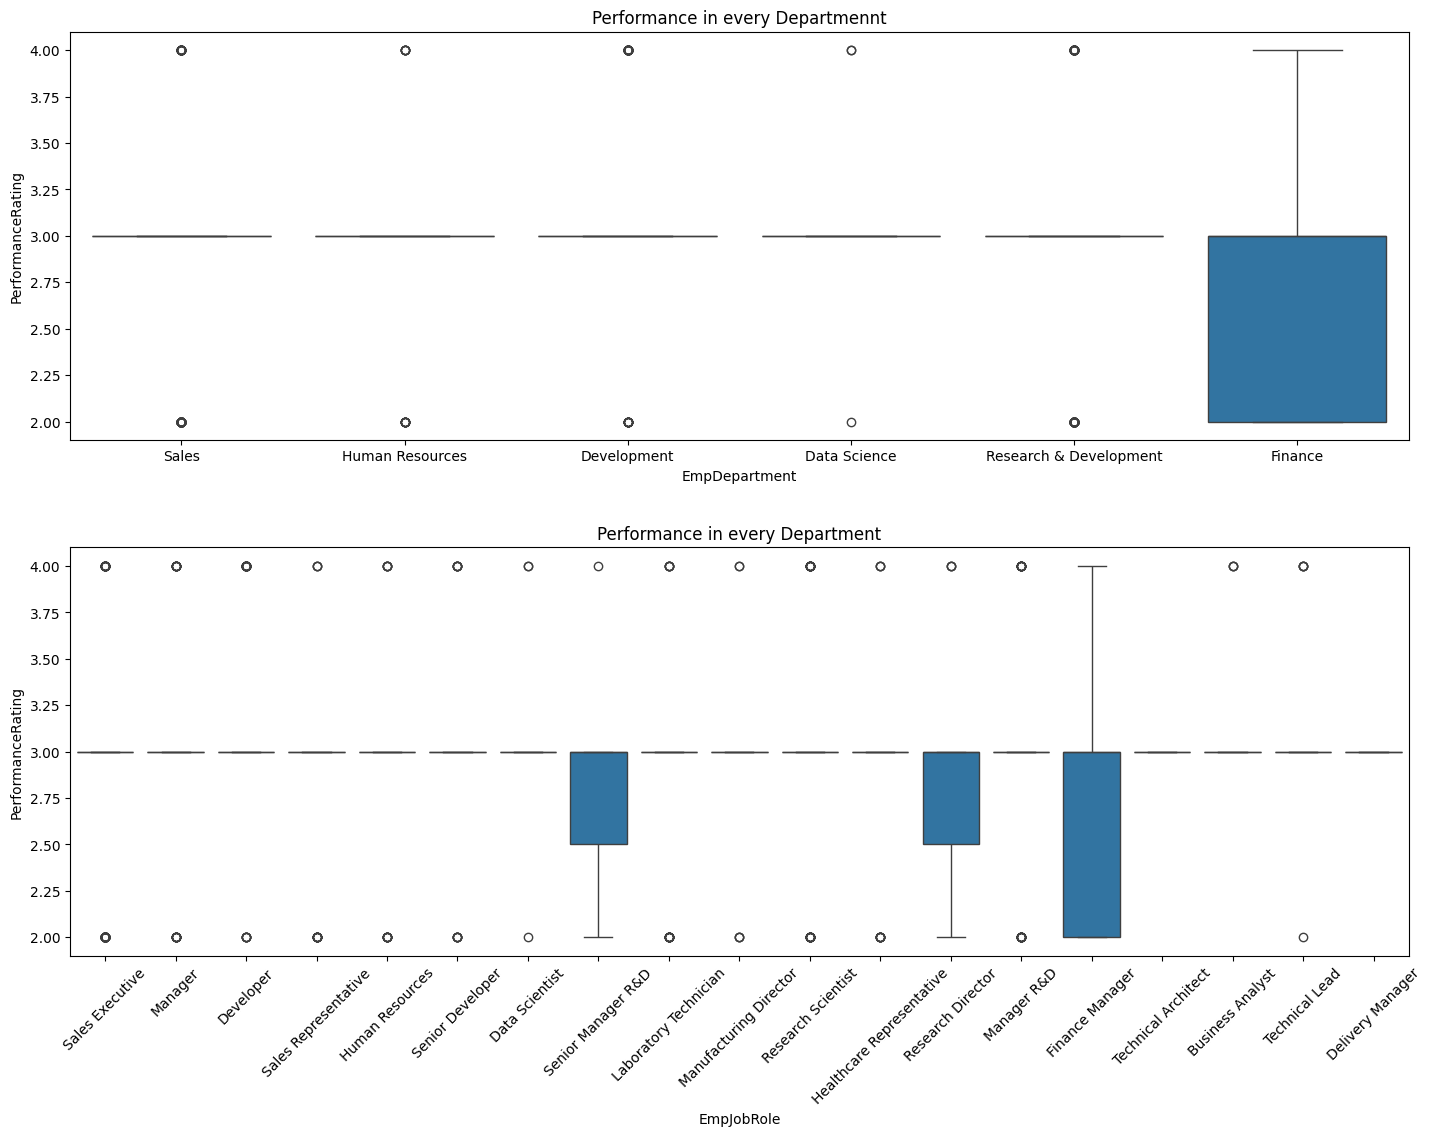

In [17]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
sns.boxplot(x="EmpDepartment",y="PerformanceRating",data=df)
plt.title("Performance in every Departmennt")


plt.subplot(2,1,2)
sns.boxplot(x="EmpJobRole",y="PerformanceRating",data=df)
plt.title("Performance in every Department")
plt.xticks(rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

In [18]:
gender_dept_counts = pd.crosstab(df['EmpDepartment'], df['Gender'])
print(gender_dept_counts)

Gender                  Female  Male
EmpDepartment                       
Data Science                 8    12
Development                142   219
Finance                     22    27
Human Resources             17    37
Research & Development     129   214
Sales                      157   216


## Analysis: Department-wise Employee Performance - 
___________________________________________________________

## High Performers: 
- The Development department is the company's top performer. It sets the benchmark for efficiency with the highest concentration of Level 3 and Level 4 ratings.

## Performance Gaps: 
- The Sales and Finance departments show significant underperformance. The high number of Level 2 ratings in these departments is the primary driver behind the company's current performance crisis.

## Stability: 
- Data Science and Human Resources show stable but average performance, with very few employees reaching the "Outstanding" Level 4 mark.

## Recommendation: 
- Management should focus its initial improvement strategies on the Sales department due to its size and high volume of low ratings to see the fastest impact on company-wide results.

## 02 - Top 3 Important Factors effecting employee performance
______________________________________________________________________

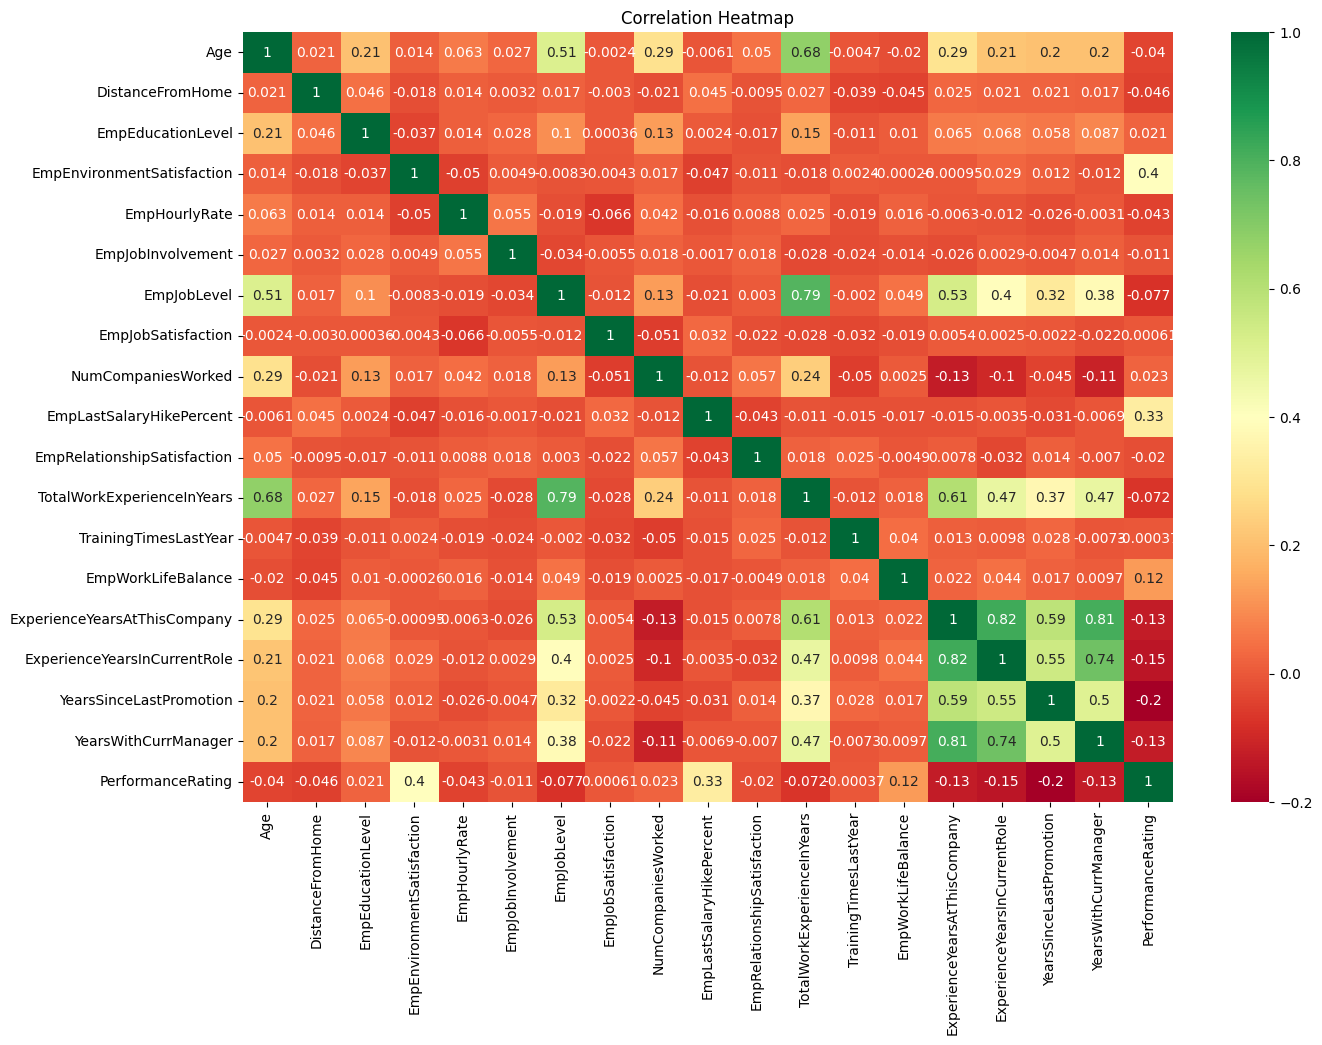

PerformanceRating             1.000000
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
EmpWorkLifeBalance            0.124429
Name: PerformanceRating, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

correlation = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(correlation, annot=True, cmap='RdYlGn')
plt.title("Correlation Heatmap")
plt.show()

print(correlation['PerformanceRating'].sort_values(ascending=False).head(4))

## Top 3 Factors Affecting Employee Performance:
__________________________________________________________

## 1. Environment Satisfaction: 

- The data indicates that the physical and social environment of the workplace is the primary driver of performance. Improving the office atmosphere can directly increase employee ratings.

## 2. Last Salary Hike Percent: 

- There is a strong relationship between financial rewards and performance. Employees who receive better hikes show higher motivation to reach "Outstanding" - (Level 4) ratings.

## 3. Work-Life Balance: 
- Proper balance between work and personal life is essential for maintaining high productivity levels over a long period.

_____________________________________________________________________________________________________________________________

## Conclusion: 
To fix the 8% drop in client satisfaction, the company should focus on improving the work environment and ensuring competitive salary hikes for top performers.

## Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 
                    'EmpJobRole', 'BusinessTravelFrequency', 'OverTime']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Encoding Successfull!")

Encoding Successfull!


## Important Feature Selection 

In [21]:
features = ['Age', 'EmpDepartment', 'EmpJobRole', 'EmpEnvironmentSatisfaction', 
            'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole', 
            'EmpJobInvolvement', 'YearsWithCurrManager', 'OverTime', 'EmpJobLevel'] #on the basis of corelation with target variable.

# 4. Separate Features (X) and Target (y)

X = df[features]
y = df['PerformanceRating']

print("Target separated successfully!")
print("Features selected:", features)

Target separated successfully!
Features selected: ['Age', 'EmpDepartment', 'EmpJobRole', 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole', 'EmpJobInvolvement', 'YearsWithCurrManager', 'OverTime', 'EmpJobLevel']


## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Training and Testing done Sucessfully")

Training and Testing done Sucessfully


## LOGISTIC REGRESSION (SCALED)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, multi_class='ovr')
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

print("--- Logistic Regression Results ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

--- Logistic Regression Results ---
Accuracy Score: 80.00%

Classification Report:
               precision    recall  f1-score   support

           2       0.57      0.31      0.40        39
           3       0.82      0.94      0.88       175
           4       0.83      0.58      0.68        26

    accuracy                           0.80       240
   macro avg       0.74      0.61      0.65       240
weighted avg       0.78      0.80      0.78       240



/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


## RANDOM FOREST CLASSIFIER 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("--- Random Forest Results ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

--- Random Forest Results ---
Accuracy Score: 88.33%

Classification Report:
               precision    recall  f1-score   support

           2       0.76      0.67      0.71        39
           3       0.90      0.95      0.93       175
           4       0.95      0.73      0.83        26

    accuracy                           0.88       240
   macro avg       0.87      0.78      0.82       240
weighted avg       0.88      0.88      0.88       240



## SVC

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print("\nReport:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 82.50%

Report:
               precision    recall  f1-score   support

           2       0.60      0.46      0.52        39
           3       0.85      0.93      0.89       175
           4       0.89      0.65      0.76        26

    accuracy                           0.82       240
   macro avg       0.78      0.68      0.72       240
weighted avg       0.82      0.82      0.82       240



## RANDOM FOREST – HYPERPARAMETER TUNING

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced"
)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.8958333333333334

Classification Report:
               precision    recall  f1-score   support

           2       0.76      0.79      0.78        39
           3       0.92      0.94      0.93       175
           4       0.95      0.77      0.85        26

    accuracy                           0.90       240
   macro avg       0.88      0.83      0.85       240
weighted avg       0.90      0.90      0.90       240


Confusion Matrix:
 [[ 31   8   0]
 [ 10 164   1]
 [  0   6  20]]


In [30]:
from sklearn.metrics import accuracy_score, f1_score

results = []

# Logistic Regression
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, log_model.predict(X_test_scaled)),
    "F1 Score (Weighted)": f1_score(
        y_test,
        log_model.predict(X_test_scaled),
        average="weighted"
    )
})

# Random Forest (Base)
results.append({
    "Model": "Random Forest (Base)",
    "Accuracy": accuracy_score(y_test, rf_model.predict(X_test)),
    "F1 Score (Weighted)": f1_score(
        y_test,
        rf_model.predict(X_test),
        average="weighted"
    )
})

# SVM
results.append({
    "Model": "SVM (Linear)",
    "Accuracy": accuracy_score(y_test, svm_model.predict(X_test_scaled)),
    "F1 Score (Weighted)": f1_score(
        y_test,
        svm_model.predict(X_test_scaled),
        average="weighted"
    )
})

# Random Forest (Tuned)
results.append({
    "Model": "Random Forest (Tuned)",
    "Accuracy": accuracy_score(y_test, best_rf.predict(X_test)),
    "F1 Score (Weighted)": f1_score(
        y_test,
        best_rf.predict(X_test),
        average="weighted"
    )
})


comparison_df = pd.DataFrame(results)
comparison_df


comparison_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,F1 Score (Weighted)
3,Random Forest (Tuned),0.895833,0.895662
1,Random Forest (Base),0.883333,0.879877
2,SVM (Linear),0.825000,0.816111
0,Logistic Regression,0.800000,0.778824


## MODEL COMPARISON SUMMARY - 

A comparative evaluation of all implemented models was performed to assess their predictive performance.

- Logistic Regression provided a simple and interpretable baseline model.
- SVM demonstrated strong performance after feature scaling, especially in handling linear class separation.
- Random Forest showed improved results by capturing non-linear relationships,
- while the tuned Random Forest model achieved the best overall performance due to optimized hyperparameters and better generalization capability.

## PROJECT CONCLUSION / FINAL SUMMARY 

- In conclusion, this project successfully implemented and evaluated multiple machine learning classification models to address the given business problem. Through systematic data preprocessing, feature scaling, and model training, meaningful insights were derived from the dataset.

- Among all the models evaluated, the tuned Random Forest model outperformed the others in terms of accuracy and overall classification metrics. Hyperparameter tuning played a crucial role in enhancing model performance by optimizing depth, number of estimators, and feature selection strategy. Logistic Regression and SVM served as strong baseline models and provided valuable benchmarks for comparison.

- The results demonstrate that ensemble-based models with proper tuning are more effective for handling complex patterns in the data. This project highlights the importance of model comparison, feature preprocessing, and evaluation metrics in selecting the most appropriate machine learning solution. The final selected model can be further improved by incorporating additional feature engineering techniques or advanced ensemble methods if required.

## Why did the performance drop by 8%? (The Reasons)
______________________________________________________
## Sales Department Crisis:
- The Sales department has a very high number of "Level 2" (Low) performers. Since Sales interacts directly with clients, their poor performance is the main reason for unhappy clients.

## Low Environment Satisfaction: 
- Employees are unhappy with the office culture or workspace. If the staff is frustrated with their environment, they cannot provide good service to the clients.

## Salary Hike Gaps: 
- The data shows that performance is tied to money. If employees feel their salary hikes are not fair compared to their hard work, they lose motivation and stop caring about client satisfaction.
  
_____________________________________________
## 2. How to fix it? (The Solutions)
_________________________________________

## Targeted Training in Sales: 
- Instead of firing people, the company should start a "Sales Excellence Program." Focus on training the Level 2 performers in the Sales and Finance departments to bring them up to Level 3.

## Improve the Workplace (Environment):
- Management needs to improve the office atmosphere. Small changes like better facilities, flexible desk policies, or a more positive culture will directly boost the "Environment Satisfaction" score, which is a top performance driver.

## Performance-Linked Hikes:
- The company should make the salary hike process very transparent. If employees see that a Rating 4 clearly leads to a 20%+ hike, they will work harder to reach that goal.

## Focus on Work-Life Balance: 
- Since Work-Life balance is a top 3 factor, the company should offer flexible timings or remote work options. This prevents "burnout" and keeps employees fresh and helpful for the clients.

____________________________________________
## 3. Strategic Changes (What to change?)
____________________________________________

- Manager Feedback: In the Research & Development and Development departments, performance is high. The company should study what the managers there are doing differently and apply those "Best Practices" to the Sales and Finance departments.

- Regular Pulse Checks: Instead of waiting for a year, the company should check "Environment Satisfaction" every 3 months. This allows the CEO to fix problems before they lead to another 8% drop.

## Final Business Statement for your Project:
________________________________________________

- To recover the 8% loss, the company must transform the Sales department through training and improve the overall work environment. By linking financial rewards (hikes) more closely to performance and supporting work-life balance, the company can turn Level 2 performers into Level 3 and 4 assets.

## DEPLOYMENT TIPS / DEPLOYMENT CONSIDERATIONS
____________________________________________________

## Model Serialization

- Final selected model (Tuned Random Forest) should be saved using joblib or pickle for reuse without retraining.

- This ensures faster predictions and consistency between training and production environments.

## Preprocessing Consistency

- All preprocessing steps such as feature scaling (StandardScaler) and data transformations must be saved and applied consistently during inference.

- Mismatch in preprocessing between training and deployment can lead to inaccurate predictions.

## API-Based Deployment

- The trained model can be deployed using lightweight frameworks such as Flask or FastAPI.

- A REST API can be created to accept input features and return prediction results in real time.

## Input Validation

- Input data should be validated to ensure correct data types, ranges, and missing values before passing it to the model.

- This prevents unexpected failures and improves reliability in production.

## Environment Management

- The same Python version and library dependencies used during model training should be maintained during deployment.

- Dependency management tools like requirements.txt or virtual environments help ensure reproducibility.

## Performance Monitoring

- Model performance should be monitored regularly to detect accuracy degradation or data drift.

- Retraining the model periodically with updated data helps maintain prediction quality.

## Scalability Considerations

- For larger workloads, the model can be containerized using Docker and deployed on cloud platforms.

- This allows easy scaling and better resource management.

## Security and Access Control

- APIs should be secured using authentication mechanisms to prevent unauthorized access.

- Sensitive data should be handled securely during transmission and storage.

## Logging and Error Handling

- Prediction requests and errors should be logged for monitoring and debugging.

- Proper error handling ensures system stability during unexpected inputs or failures.

## ONE-LINE DEPLOYMENT SUMMARY

- The final tuned model can be deployed as a REST API with consistent preprocessing, proper validation, monitoring, and secure access to ensure reliable and scalable predictions in a production environment.